In [1]:
#These are libraries that you should import if needed for your notebook.
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
#from google.colab import files

In [2]:
def standard_units(arr):
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    x_standard = standard_units(t[x])
    y_standard = standard_units(t[y])
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    r = correlation(t, x, y)
    y_sd = np.std(t[y])
    x_sd = np.std(t[x])
    return r * y_sd / x_sd

def intercept(t, x, y):
    x_mean = np.mean(t[x])
    y_mean = np.mean(t[y])
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t[x] + b

def residuals(t, x, y):
    """Return an array of all the residuals"""
    predictions = fitted_values(t, x, y)
    return t[y] - predictions

# Regression Model

In [3]:
# Ignore this code; it's graphics for demonstrating the regression model
def draw_and_compare(true_slope, true_int, sample_size):
    x = np.random.normal(50, 5, sample_size)
    xlims = np.array([np.min(x), np.max(x)])
    errors = np.random.normal(0, 6, sample_size)
    y = (true_slope * x + true_int) + errors
    sample = pd.DataFrame({'x': x, 'y': y})

    # Create a figure with 4 subplots vertically arranged
    fig, axes = plots.subplots(4, 1, figsize=(8, 16))  # 4 rows, 1 colum

    sns.regplot(x='x', y='y', data=sample, scatter=True, fit_reg=False, ax=axes[0])
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    axes[0].set_title('True Line, and Points Created')


    sns.regplot(x='x', y='y', data=sample, scatter=True, fit_reg=False, ax=axes[1])
    axes[1].set_title('What We Get to See')


    sns.regplot(x='x', y='y', data=sample, scatter=True, fit_reg=True, ax=axes[2])
    axes[2].set_title('Regression Line: Estimate of True Line')

    #sample.plot.scatter('x', 'y', fit_line=True)
    sns.regplot(x='x', y='y', data=sample, scatter=True, fit_reg=True, ax=axes[3])
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    axes[3].set_title("Regression Line and True Line")

    plots.tight_layout()
    plots.show()

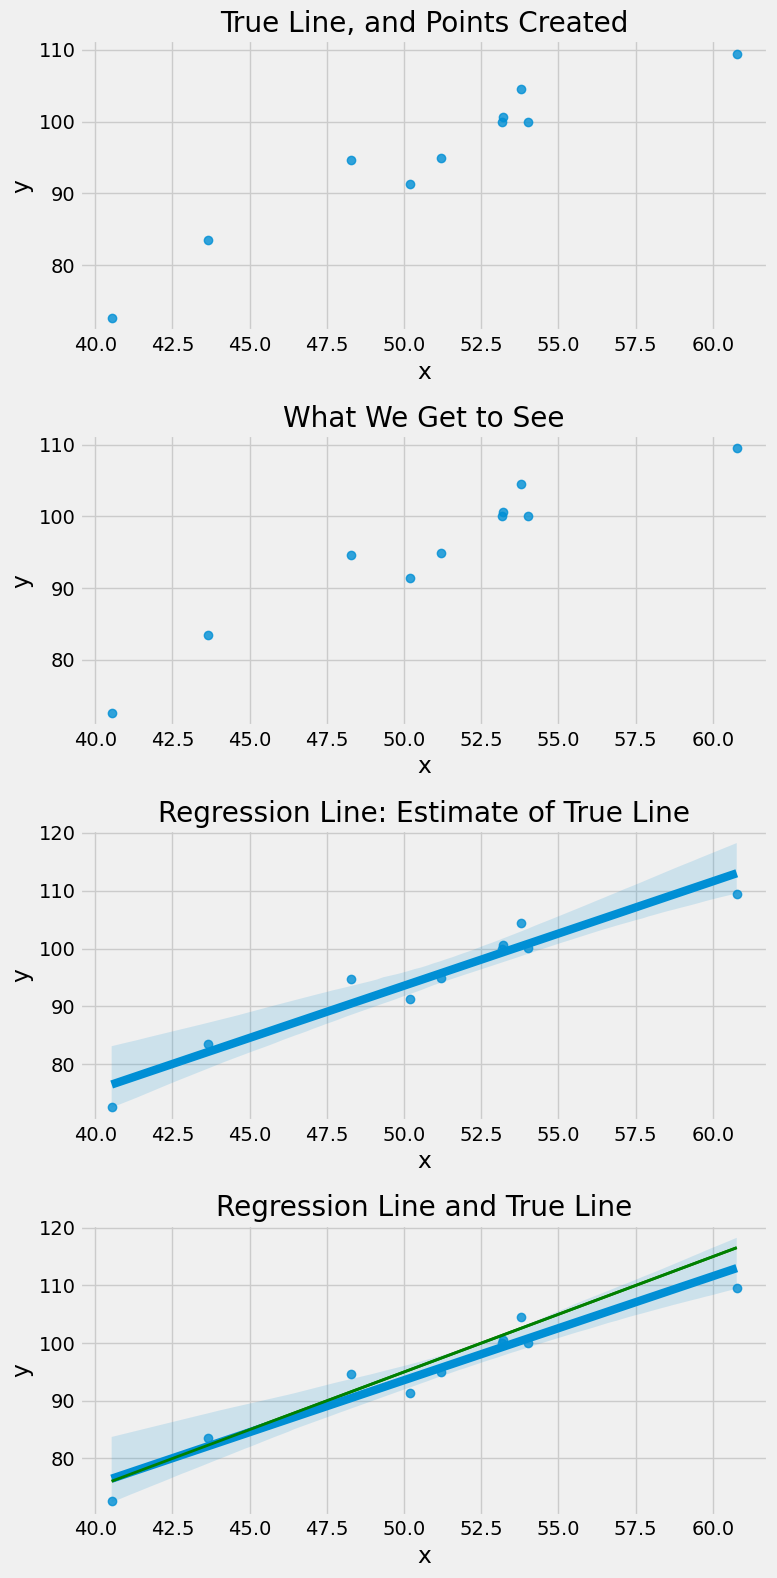

In [4]:
draw_and_compare(2, -5, 10)

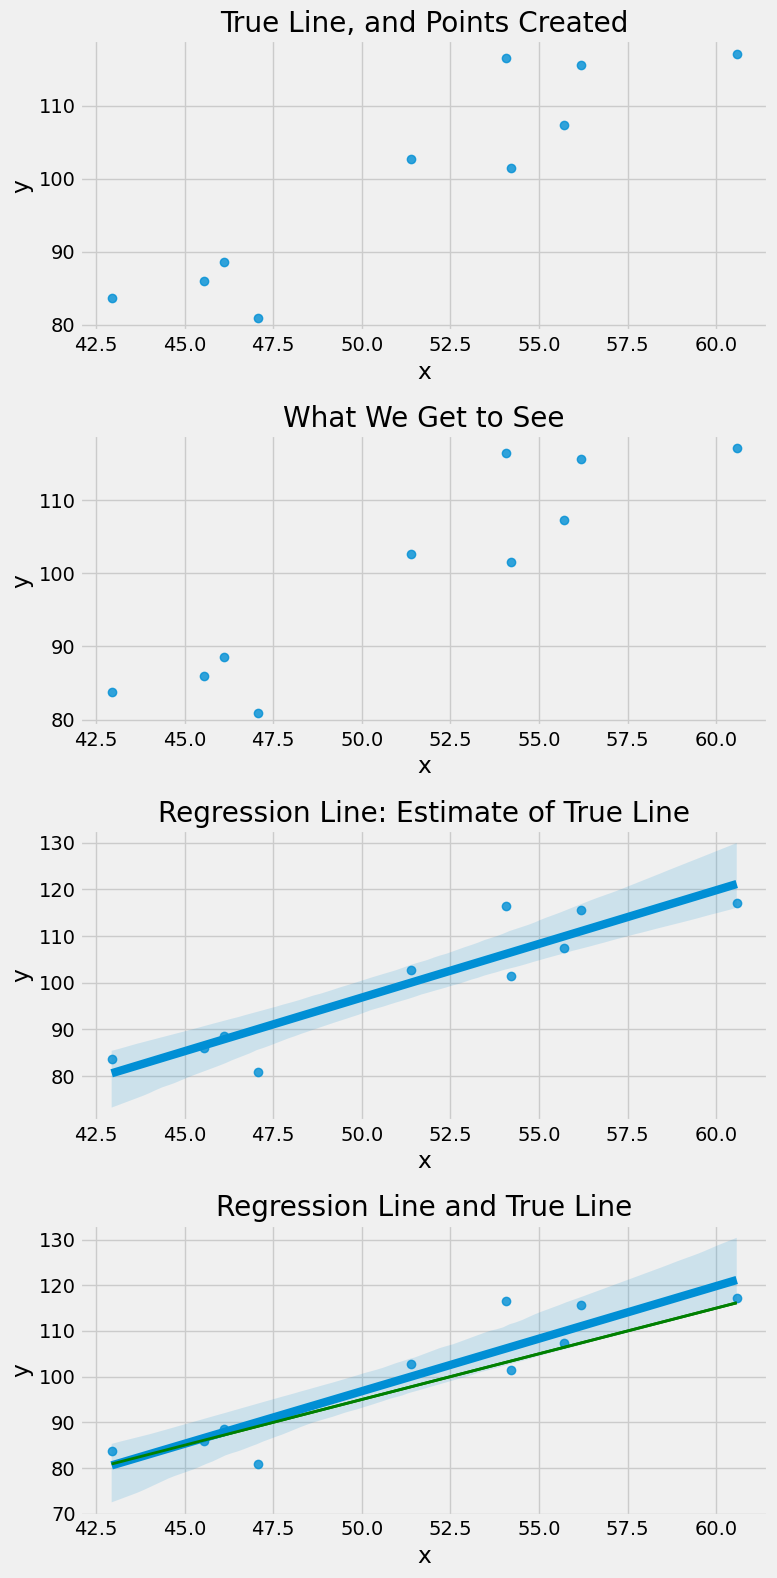

In [5]:
draw_and_compare(2, -5, 10)

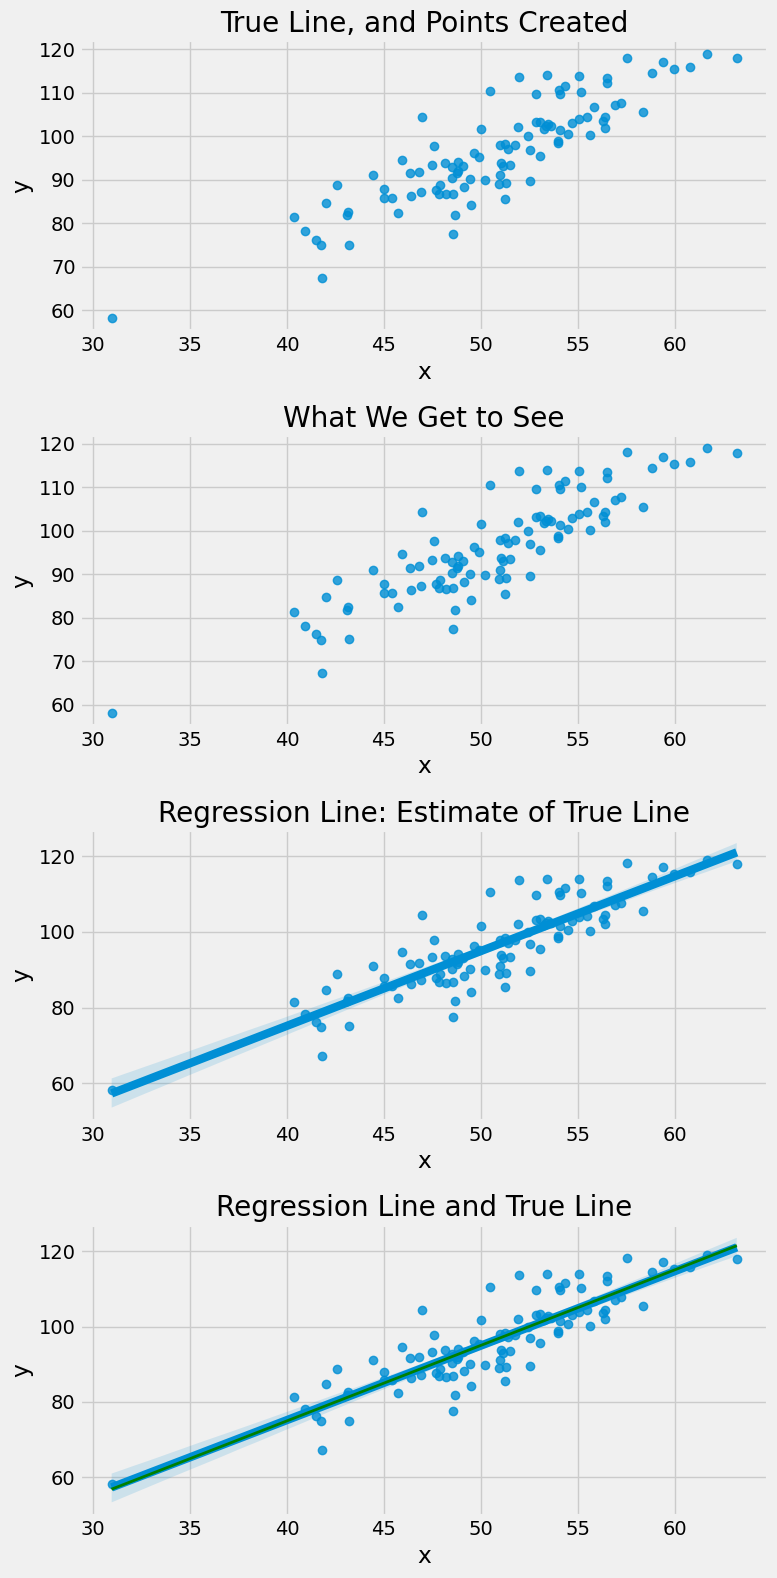

In [6]:
draw_and_compare(2, -5, 100)

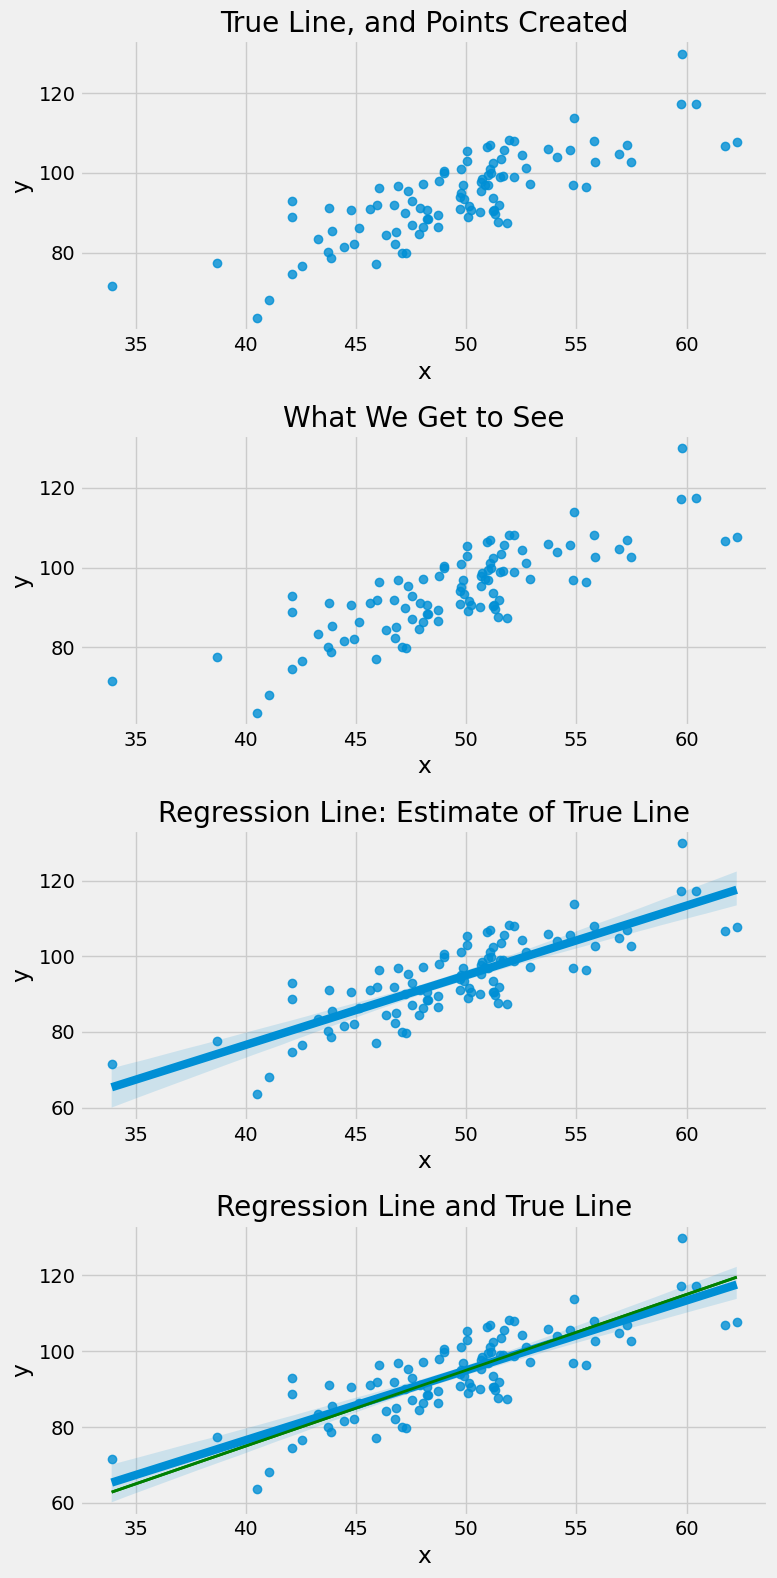

In [7]:
draw_and_compare(2, -5, 100)